In [32]:
import datetime
import pathlib
import locale

import geopandas as gpd
import matplotlib.cm
import matplotlib.dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

plt.style.use("dark_background")

In [7]:
data_dir = pathlib.Path('~/data/drought/ivs').expanduser()

In [41]:
datetime.datetime.strptime("2022-33-1", "%Y-%W-%w")
from babel.numbers import parse_decimal
parse_decimal('1.234.345,00', locale='nl_NL')

Decimal('1234345.00')

In [49]:
df = pd.read_csv(data_dir  / 'logchem.csv', sep=';')
df['date'] = df.apply(lambda row: datetime.datetime.strptime(f"2022-{row['week']}-1", "%Y-%W-%w"), axis=1)
df['Logchem cargo per week [ton]'] = df['aangekomen lading per week (ton)'].apply(lambda x: parse_decimal(x, locale='nl_NL') if isinstance(x, str) else x)
df.head()


,week,aangekomen lading per week (ton),Afvoer Lobith (m3/s),date,Logchem cargo per week [ton]
0,1,6763,3180,2022-01-03,6763
1,2,14107,3503,2022-01-10,14107
2,3,11695,3234,2022-01-17,11695
3,4,11700,2111,2022-01-24,11700
4,5,12380,1869,2022-01-31,12380


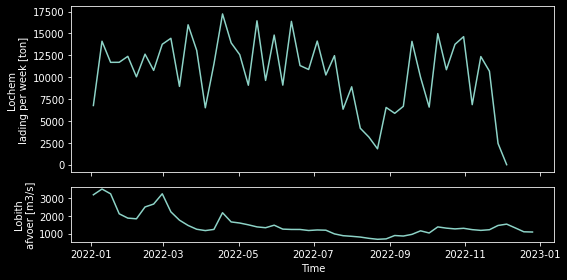

In [66]:
fig, axes = plt.subplots(figsize=(8, 4), nrows=2, height_ratios=(3, 1), sharex=True)
ax = axes[0]
ax.plot(df['date'], df['Logchem cargo per week [ton]'])
ax.set_ylabel('Lochem\nlading per week [ton]')
ax = axes[1]
ax.plot(df['date'], df['Afvoer Lobith (m3/s)'])
ax.set_ylabel('Lobith\nafvoer [m3/s]')
ax.set_xlabel('Time')
fig.tight_layout()
fig.savefig('/Users/baart_f/src/drought-scrolly/example/drought-scrolly/images/figures/lochem-ivs-trend.png')

Text(3.200000000000003, 0.5, 'Lobith discharge [m3/s]')